In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes =["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y, index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

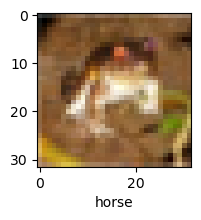

In [9]:
plot_sample(X_train, y_train, 0)

In [10]:
#the above was data exploration

In [11]:
#now normalization divide pixel value to 255.

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
#ANN

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 206s 130ms/step - loss: 1.8146 - accuracy: 0.3523
Epoch 2/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.6258 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.5415 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4826 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4324 - accuracy: 0.4960


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.28      0.42      1000
           1       0.61      0.60      0.60      1000
           2       0.40      0.23      0.29      1000
           3       0.36      0.31      0.33      1000
           4       0.33      0.63      0.43      1000
           5       0.38      0.44      0.41      1000
           6       0.56      0.47      0.51      1000
           7       0.71      0.38      0.50      1000
           8       0.59      0.64      0.61      1000
           9       0.43      0.71      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5244 - accuracy: 0.4478
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1784 - accuracy: 0.5829
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0391 - accuracy: 0.6366
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9473 - accuracy: 0.6696
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8850 - accuracy: 0.6924
Epoch 6/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8332 - accuracy: 0.7104
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7884 - accuracy: 0.7257
Epoch 8/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7513 - accuracy: 0.7392
Epoch 9/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7155 - accuracy: 0.7551
Epoch 10/10
1563/1563 [==============================] - 73s 46m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.8923 - accuracy: 0.7019


[0.8922619223594666, 0.7019000053405762]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[2.51058419e-03, 4.15065966e-04, 1.04498898e-03, 7.63102233e-01,
        6.56855351e-04, 1.63570106e-01, 2.13488862e-02, 1.55159112e-04,
        4.38362993e-02, 3.35980067e-03],
       [5.74429706e-03, 7.21800979e-03, 7.83883752e-06, 1.21986591e-06,
        2.11163425e-08, 9.00878749e-09, 2.24452301e-09, 4.61493244e-09,
        9.86984909e-01, 4.36883893e-05],
       [1.31438255e-01, 1.76434517e-01, 5.06903452e-04, 3.05680628e-03,
        1.36005110e-04, 1.05799736e-04, 3.49573929e-05, 3.00864427e-04,
        6.55312479e-01, 3.26734297e-02],
       [8.29088092e-01, 1.26744658e-01, 4.32266854e-04, 4.40176664e-05,
        7.43064957e-05, 5.57425494e-07, 2.21068200e-04, 6.47930710e-06,
        4.32686731e-02, 1.19901444e-04],
       [7.64035940e-06, 2.47248499e-05, 1.03689283e-02, 5.69568994e-03,
        2.65063465e-01, 1.96835259e-03, 7.16624141e-01, 1.19331344e-05,
        2.30568767e-04, 4.52560653e-06]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [25]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

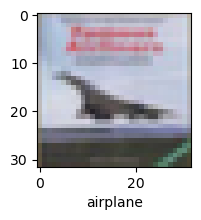

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
classes[y_classes[3]]

'airplane'